# 1. Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 2. Upload Data

In [3]:
df1 = pd.read_csv(r"E:\Yashu\Yasmeen\Yashu Files\Machine Learning\Data sets\Housing Habitability Data.csv")

# 3. Data Exploration

In [4]:
df = df1

In [5]:
df.head(8)

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70
5,0xe2a,Single-family home,1779,3.0,3,Semi_Furnished,0.0,No,Once in a day - Evening,7.43,NaN,Medium,100.0,2.90,74.88
6,0x2ea5,Duplex,1281,5.0,2,Semi_Furnished,3.0,No,All time,7.72,Well above average,Medium,143.0,0.96,28.54
7,0xb0fb,Apartment,159,2.0,2,Semi_Furnished,0.0,Yes,Once in a day - Morning,6.77,Well below average,Medium,90.0,4.48,80.65


In [6]:
df.shape

(35549, 15)

In [7]:
df.describe()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
count,35549.000000,34059.000000,35549.000000,34296.000000,35549.000000,35549.000000,35549.000000,35549.000000
mean,1389.695603,3.923251,2.332274,0.484284,6.354873,121.441194,3.734728,73.468186
std,1940.160413,2.692871,1.179978,0.751487,1.220157,62.659486,0.797930,14.134287
min,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.280000
25%,495.000000,2.000000,1.000000,0.000000,5.600000,95.000000,3.220000,69.650000
50%,932.000000,4.000000,2.000000,0.000000,6.460000,113.000000,3.850000,75.770000
75%,1774.000000,5.000000,3.000000,1.000000,7.220000,140.000000,4.250000,82.250000
max,28064.000000,15.000000,6.000000,3.000000,9.910000,1044.000000,5.000000,100.000000


In [8]:
df.columns

Index(['Property_ID', 'Property_Type', 'Property_Area', 'Number_of_Windows',
       'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts',
       'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Crime_Rate',
       'Dust_and_Noise', 'Air_Quality_Index', 'Neighborhood_Review',
       'Habitability_score'],
      dtype='object')

# 4. Data Cleaning

### Chekking Duplicates

In [9]:
len(df[df.duplicated()==True])

0

There are no any duplicate records in a dataset.

### Dealling with Null and Noise values

In [10]:
for i in df.columns:
    print(i, df[i].sort_values().unique(), '\n')

Property_ID ['0x1000' '0x1001' '0x1002' ... '0xffb' '0xffe' '0xfff'] 

Property_Type ['#R%$G&867' 'Apartment' 'Bungalow' 'Container Home' 'Duplex'
 'Single-family home'] 

Property_Area [  100   101   102 ... 28011 28033 28064] 

Number_of_Windows [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. nan] 

Number_of_Doors [1 2 3 4 5 6] 

Furnishing ['Fully Furnished' 'Semi_Furnished' 'Unfurnished' nan] 

Frequency_of_Powercuts [ 0.  1.  2.  3. nan] 

Power_Backup ['NOT MENTIONED' 'No' 'Yes'] 

Water_Supply ['All time' 'NOT MENTIONED' 'Once in a day - Evening'
 'Once in a day - Morning' 'Once in two days'] 

Traffic_Density_Score [0.   0.12 0.18 0.54 0.72 0.81 0.9  0.93 0.99 1.05 1.11 1.21 1.3  1.32
 1.33 1.36 1.38 1.39 1.41 1.45 1.52 1.53 1.54 1.67 1.68 1.69 1.72 1.76
 1.78 1.79 1.8  1.82 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.93 1.94
 1.96 1.97 2.02 2.03 2.04 2.05 2.12 2.15 2.16 2.18 2.19 2.2  2.21 2.22
 2.23 2.24 2.25 2.26 2.27 2.28 2.29 2.3  2.31 2.32 2.33 2.34 2.35 2

In [11]:
len(df[df['Property_Type']== '#R%$G&867'])

463

In [12]:
df['Property_Type'] = df['Property_Type'].replace('#R%$G&867',np.nan)

In [13]:
for i in df.columns:
    print(i, df[i].sort_values().unique(), '\n')

Property_ID ['0x1000' '0x1001' '0x1002' ... '0xffb' '0xffe' '0xfff'] 

Property_Type ['Apartment' 'Bungalow' 'Container Home' 'Duplex' 'Single-family home' nan] 

Property_Area [  100   101   102 ... 28011 28033 28064] 

Number_of_Windows [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. nan] 

Number_of_Doors [1 2 3 4 5 6] 

Furnishing ['Fully Furnished' 'Semi_Furnished' 'Unfurnished' nan] 

Frequency_of_Powercuts [ 0.  1.  2.  3. nan] 

Power_Backup ['NOT MENTIONED' 'No' 'Yes'] 

Water_Supply ['All time' 'NOT MENTIONED' 'Once in a day - Evening'
 'Once in a day - Morning' 'Once in two days'] 

Traffic_Density_Score [0.   0.12 0.18 0.54 0.72 0.81 0.9  0.93 0.99 1.05 1.11 1.21 1.3  1.32
 1.33 1.36 1.38 1.39 1.41 1.45 1.52 1.53 1.54 1.67 1.68 1.69 1.72 1.76
 1.78 1.79 1.8  1.82 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.93 1.94
 1.96 1.97 2.02 2.03 2.04 2.05 2.12 2.15 2.16 2.18 2.19 2.2  2.21 2.22
 2.23 2.24 2.25 2.26 2.27 2.28 2.29 2.3  2.31 2.32 2.33 2.34 2.35 2.36
 2.37

In [14]:
df.isnull().sum().sort_values(ascending=False)

Number_of_Windows         1490
Frequency_of_Powercuts    1253
Dust_and_Noise            1108
Furnishing                 929
Crime_Rate                 721
Property_Type              463
Property_ID                  0
Property_Area                0
Number_of_Doors              0
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

In [15]:
len(df)/len(df[df['Number_of_Windows']==True])

9.301151229722658

In [16]:
df=df.dropna()

In [17]:
df.isnull().sum()

Property_ID               0
Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
Habitability_score        0
dtype: int64

In [18]:
df.shape

(29988, 15)

### Droping redendant columns and Checking Data types

In [19]:
df.drop(['Property_ID'], axis = 1, inplace = True)

C:\Users\dell6\AppData\Local\Temp\ipykernel_8208\4058952879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Property_ID'], axis = 1, inplace = True)


Property_ID has all the unique values and this column is not important to create a model. It is better to drop it.

In [20]:
df.dtypes

Property_Type              object
Property_Area               int64
Number_of_Windows         float64
Number_of_Doors             int64
Furnishing                 object
Frequency_of_Powercuts    float64
Power_Backup               object
Water_Supply               object
Traffic_Density_Score     float64
Crime_Rate                 object
Dust_and_Noise             object
Air_Quality_Index         float64
Neighborhood_Review       float64
Habitability_score        float64
dtype: object

In [21]:
df.head(1)

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
1,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.2


### Pairplot with KDE

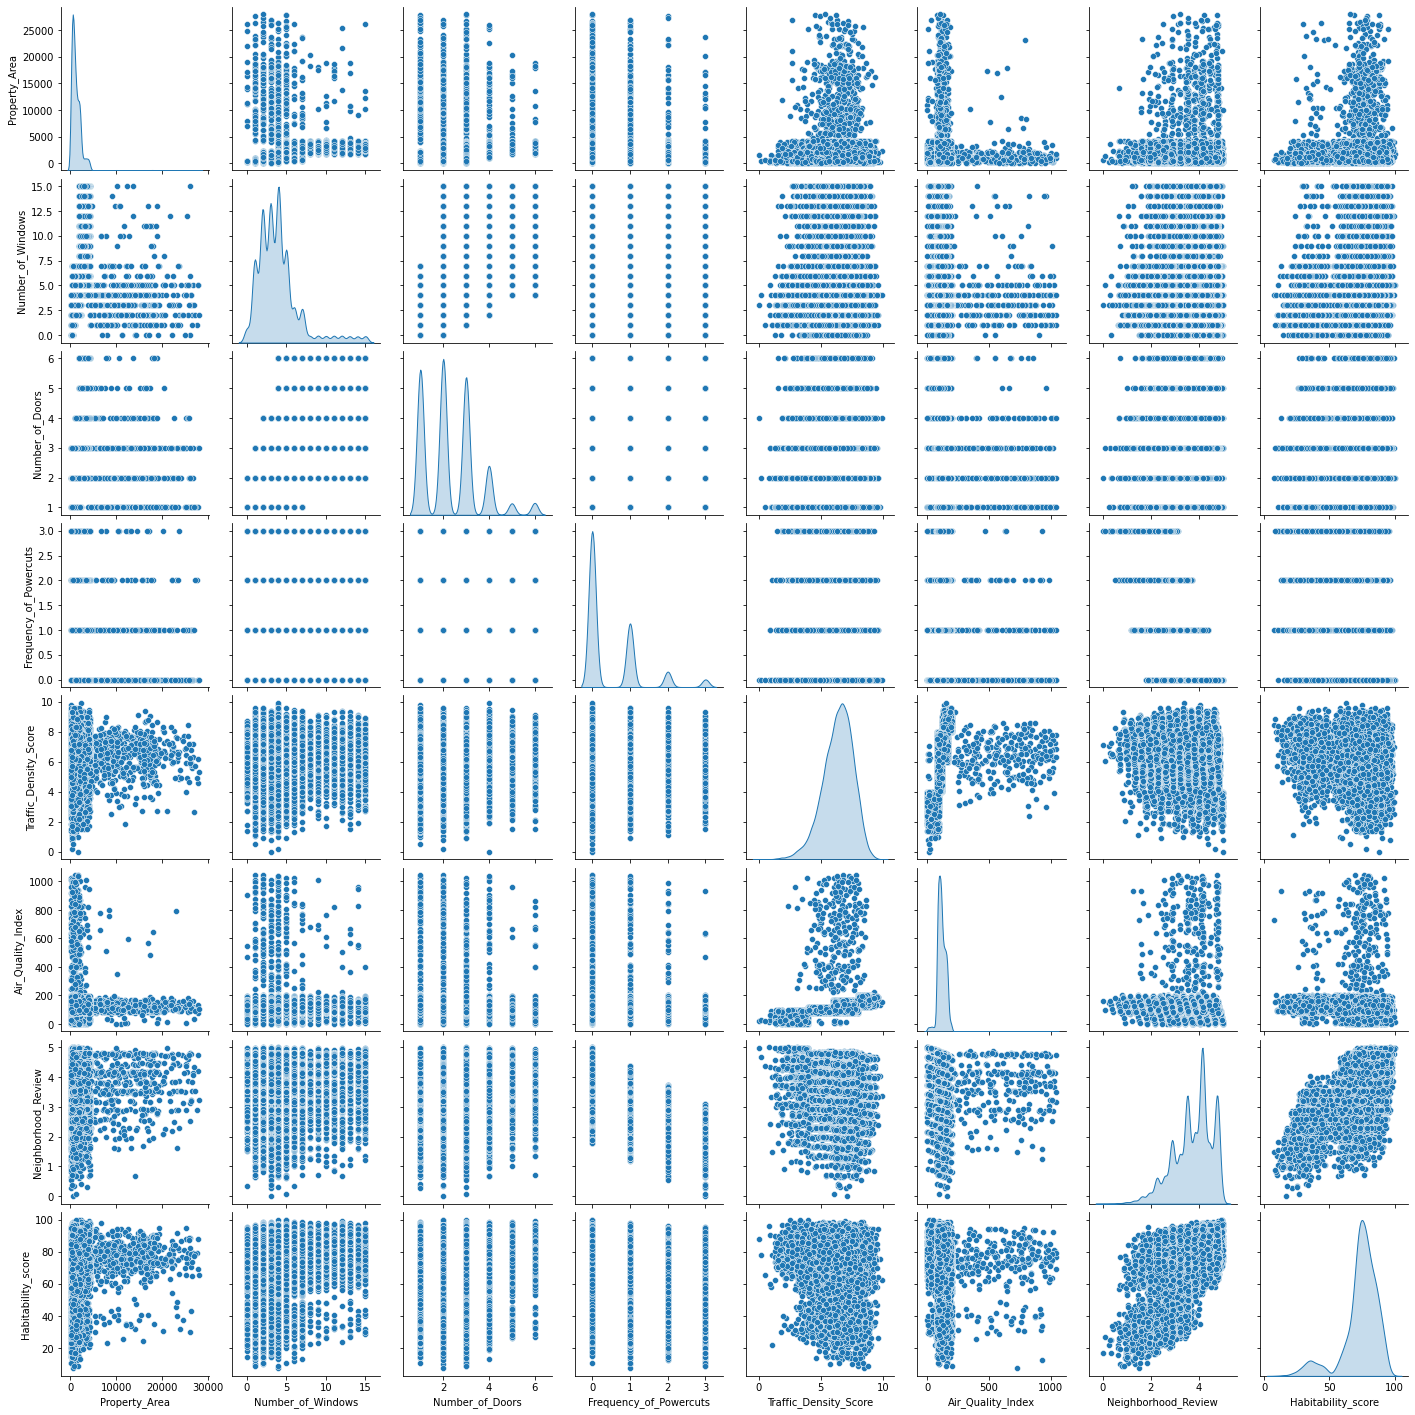

In [22]:
sns.pairplot(df,diag_kind = 'kde')

### Checking Correlation

<AxesSubplot:>

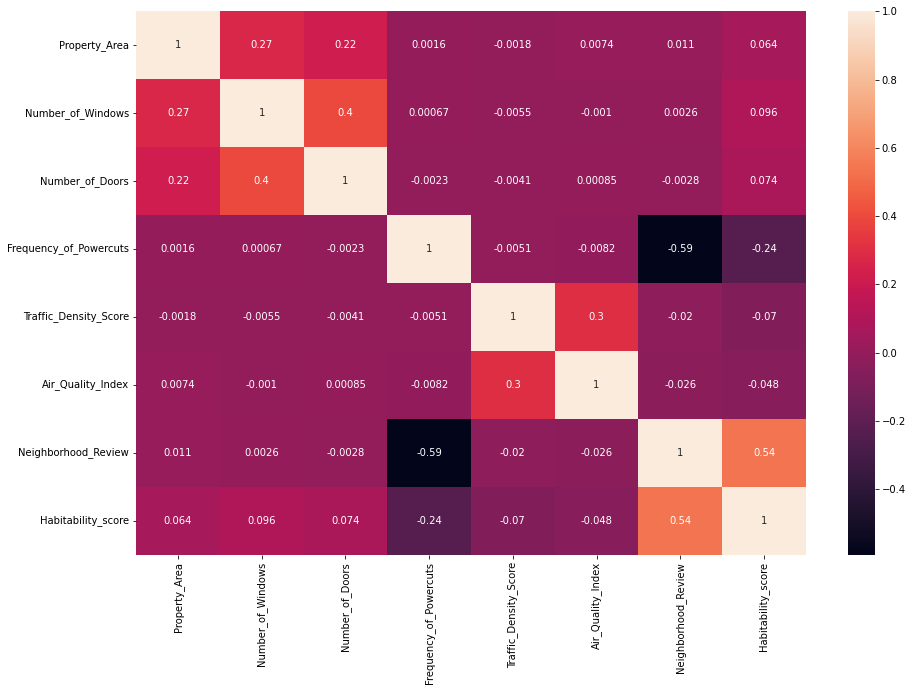

In [23]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True)

There is no strong correlation among any of the variale, that mean each and every column is important for creating a model.

### Chacking Numerical and Categorical Columns

In [24]:
num = []
cat = []

for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
        
    else:
        num.append(i)
        
print('Numerical_columns:',num, '\n')
print('Categorical_columns:',cat)

Numerical_columns: ['Property_Area', 'Number_of_Windows', 'Number_of_Doors', 'Frequency_of_Powercuts', 'Traffic_Density_Score', 'Air_Quality_Index', 'Neighborhood_Review', 'Habitability_score'] 

Categorical_columns: ['Property_Type', 'Furnishing', 'Power_Backup', 'Water_Supply', 'Crime_Rate', 'Dust_and_Noise']


### Checking the outliers

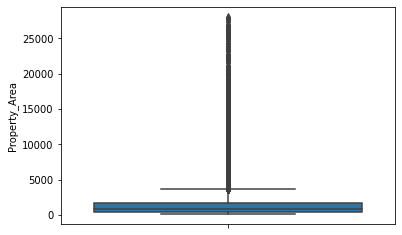

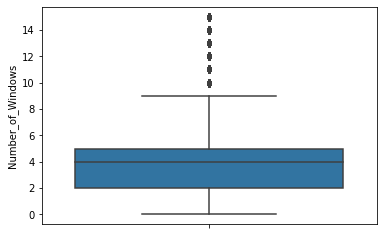

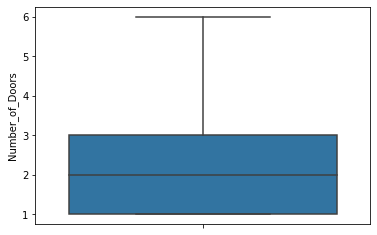

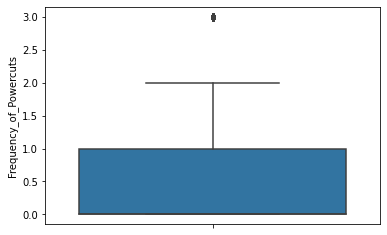

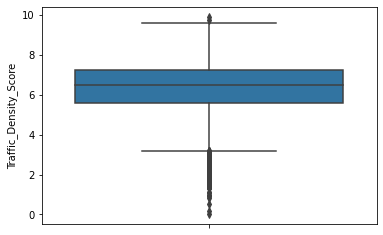

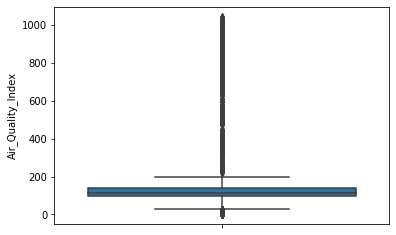

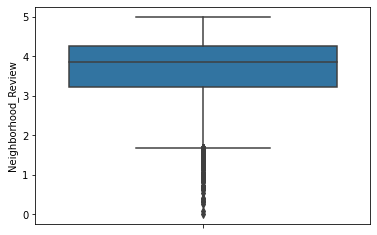

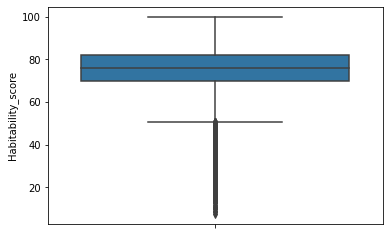

In [25]:
for i in df[num]:
    plt.figure()
    sns.boxplot(y = i, data = df)

There are so many outliers in the dataset but they are not present in 3(Three) standard deviation. And here we are getting our 97% normalize data. So instead of removing the outliers we can keep them for creating our model.

# 5. Standardization on numerical columns 

In [26]:
df.head()

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
1,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70
6,Duplex,1281,5.0,2,Semi_Furnished,3.0,No,All time,7.72,Well above average,Medium,143.0,0.96,28.54


In [27]:
sc = StandardScaler()

In [28]:
num.remove('Habitability_score')

In [29]:
df[num] = sc.fit_transform(df[num])

C:\Users\dell6\AppData\Local\Temp\ipykernel_8208\2395997950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num] = sc.fit_transform(df[num])


In [30]:
df[num]

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
1,-0.339150,-0.715036,-0.285831,0.687352,-1.626708,-0.407045,-0.229691
2,-0.337097,0.026701,-0.285831,-0.643591,0.895441,-0.008943,0.095718
3,-0.253441,-0.344168,-0.285831,2.018295,-0.160914,-0.343349,-2.995672
4,0.433257,3.735387,3.096768,-0.643591,-0.734129,-0.088564,1.297230
6,-0.057901,0.397569,-0.285831,3.349238,1.116538,0.341386,-3.471270
...,...,...,...,...,...,...,...
35542,1.344749,2.993650,3.096768,-0.643591,0.936385,-0.661830,1.347293
35543,0.987029,2.251912,1.405468,2.018295,-1.888749,-0.327425,-1.806676
35545,-0.486959,-1.085905,0.559819,0.687352,-0.537598,-0.566285,-1.005668
35546,1.224654,0.768438,3.096768,-0.643591,0.395924,0.245842,0.083203


# 6. Applying One hot encoding on Categorical Columns

### Checking unique values present in all categorical columns and converting them to numerical values by using One hot encoding

Text(0, 0.5, 'Unique Category')

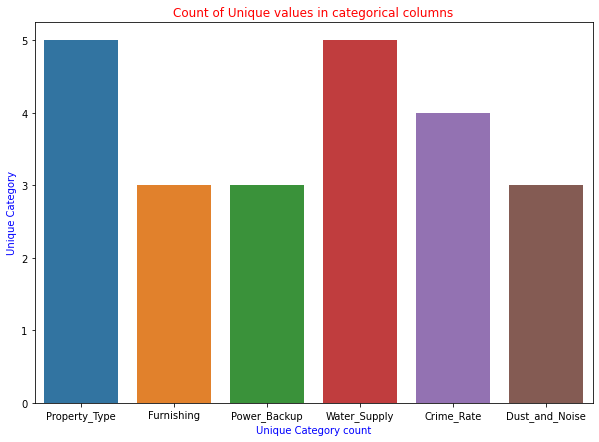

In [31]:
cat2 = []
cat1 = []

for i in df.columns:
    if df[i].dtypes == 'O':
        cat1.append(i)
        cat2.append(df[i].nunique())
        
plt.figure(figsize = (10,7))
sns.barplot(x = cat1, y = cat2)
plt.title('Count of Unique values in categorical columns', color = 'red')
plt.xlabel('Unique Category count', color = 'blue')
plt.ylabel('Unique Category', color = 'Blue')


In [32]:
df.head()

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
1,Apartment,-0.339150,-0.715036,-0.285831,Unfurnished,0.687352,No,Once in a day - Evening,-1.626708,Well below average,Medium,-0.407045,-0.229691,71.20
2,Apartment,-0.337097,0.026701,-0.285831,Fully Furnished,-0.643591,No,Once in a day - Morning,0.895441,Slightly below average,Medium,-0.008943,0.095718,71.39
3,Apartment,-0.253441,-0.344168,-0.285831,Unfurnished,2.018295,Yes,Once in a day - Morning,-0.160914,Well above average,Medium,-0.343349,-2.995672,31.46
4,Bungalow,0.433257,3.735387,3.096768,Fully Furnished,-0.643591,No,All time,-0.734129,Well below average,Medium,-0.088564,1.297230,93.70
6,Duplex,-0.057901,0.397569,-0.285831,Semi_Furnished,3.349238,No,All time,1.116538,Well above average,Medium,0.341386,-3.471270,28.54


### Finding different sub category's from category columns

In [33]:
df['Property_Type'].unique()

array(['Apartment', 'Bungalow', 'Duplex', 'Single-family home',
       'Container Home'], dtype=object)

In [34]:
df['Furnishing'].unique()

array(['Unfurnished', 'Fully Furnished', 'Semi_Furnished'], dtype=object)

In [35]:
df['Power_Backup'].unique()

array(['No', 'Yes', 'NOT MENTIONED'], dtype=object)

In [36]:
df['Water_Supply'].unique()

array(['Once in a day - Evening', 'Once in a day - Morning', 'All time',
       'NOT MENTIONED', 'Once in two days'], dtype=object)

In [37]:
df['Crime_Rate'].unique()

array(['Well below average', 'Slightly below average',
       'Well above average', 'Slightly above average'], dtype=object)

In [38]:
df['Dust_and_Noise'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [39]:
df_new = pd.get_dummies(df, drop_first= True)

In [40]:
pd.set_option('display.max_columns', None)
df_new

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home,Furnishing_Semi_Furnished,Furnishing_Unfurnished,Power_Backup_No,Power_Backup_Yes,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Crime_Rate_Slightly below average,Crime_Rate_Well above average,Crime_Rate_Well below average,Dust_and_Noise_Low,Dust_and_Noise_Medium
1,-0.339150,-0.715036,-0.285831,0.687352,-1.626708,-0.407045,-0.229691,71.20,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1
2,-0.337097,0.026701,-0.285831,-0.643591,0.895441,-0.008943,0.095718,71.39,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
3,-0.253441,-0.344168,-0.285831,2.018295,-0.160914,-0.343349,-2.995672,31.46,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1
4,0.433257,3.735387,3.096768,-0.643591,-0.734129,-0.088564,1.297230,93.70,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
6,-0.057901,0.397569,-0.285831,3.349238,1.116538,0.341386,-3.471270,28.54,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35542,1.344749,2.993650,3.096768,-0.643591,0.936385,-0.661830,1.347293,86.55,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
35543,0.987029,2.251912,1.405468,2.018295,-1.888749,-0.327425,-1.806676,78.75,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
35545,-0.486959,-1.085905,0.559819,0.687352,-0.537598,-0.566285,-1.005668,79.91,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
35546,1.224654,0.768438,3.096768,-0.643591,0.395924,0.245842,0.083203,81.44,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1


# 7. Data Prepration

### Splitting the data into x_train,x_test and y_train,y_test

In [41]:
x = df_new.drop('Habitability_score', axis = 1)
y = df_new['Habitability_score']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state= 10)

In [43]:
print(x_train.shape)
print(x_test.shape)

(20991, 24)
(8997, 24)


# 8. Training the Algorithm

And finally, to train the algorithm we execute the same code as before, using the fit() method of the LinearRegression class

Here we have to create a Linear Regression Model becase the dependent variable has continuous values.

In [44]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [45]:
df_coeff = pd.DataFrame(lr.coef_)
df_coeff

,0
0,0.143868
1,0.445914
2,0.253924
3,0.555767
4,0.003255
5,0.015734
6,6.607969
7,3.159053
8,-1.022385
9,1.201352


In [46]:
lr.intercept_

75.25869136050581

# 9: Making Predictions
To make pre-dictions on the test data, execute the following script:

In [47]:
y_pred = lr.predict(x_test)

In [49]:
y_pred

array([91.93873848, 62.35362262, 93.90519161, ..., 65.91364175,
       83.3020662 , 84.52011766])

### To compare the actual output values for X_test with the predicted values, execute the following script:

In [54]:
df_ = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_

,Actual,Predicted
18133,90.10,91.938738
5728,61.61,62.353623
34204,95.70,93.905192
15962,17.01,33.234074
1163,83.98,85.555517
...,...,...
6410,64.36,60.026099
19839,87.65,71.333929
23486,79.74,65.913642
13155,77.84,83.302066


In [53]:
print('r2 Score:',metrics.r2_score(y_test,y_pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,y_pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,y_pred))
print('root_mean_absolute_error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2 Score: 0.5952475258109688
mean_squared_error: 80.5783149568078
mean_absolute_error: 7.225712659162546
root_mean_absolute_error: 8.976542483429117


You can see that the value of Root mean square error is 8.9, which is indicating that our Algorithms are accurate (i.e., 90% Accuracy we are getting). So the Model prediction is good.

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Habitability_score'>

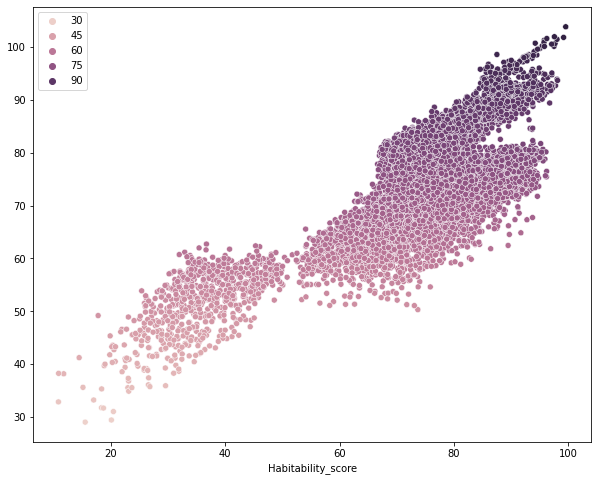

In [72]:
plt.figure(figsize = (10,8))
sns.scatterplot(y_test, y_pred, hue = y_pred, legend="brief" )

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

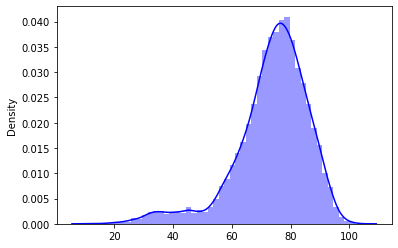

In [84]:
sns.distplot((y_test,y_pred),color='blue',label=y_pred)